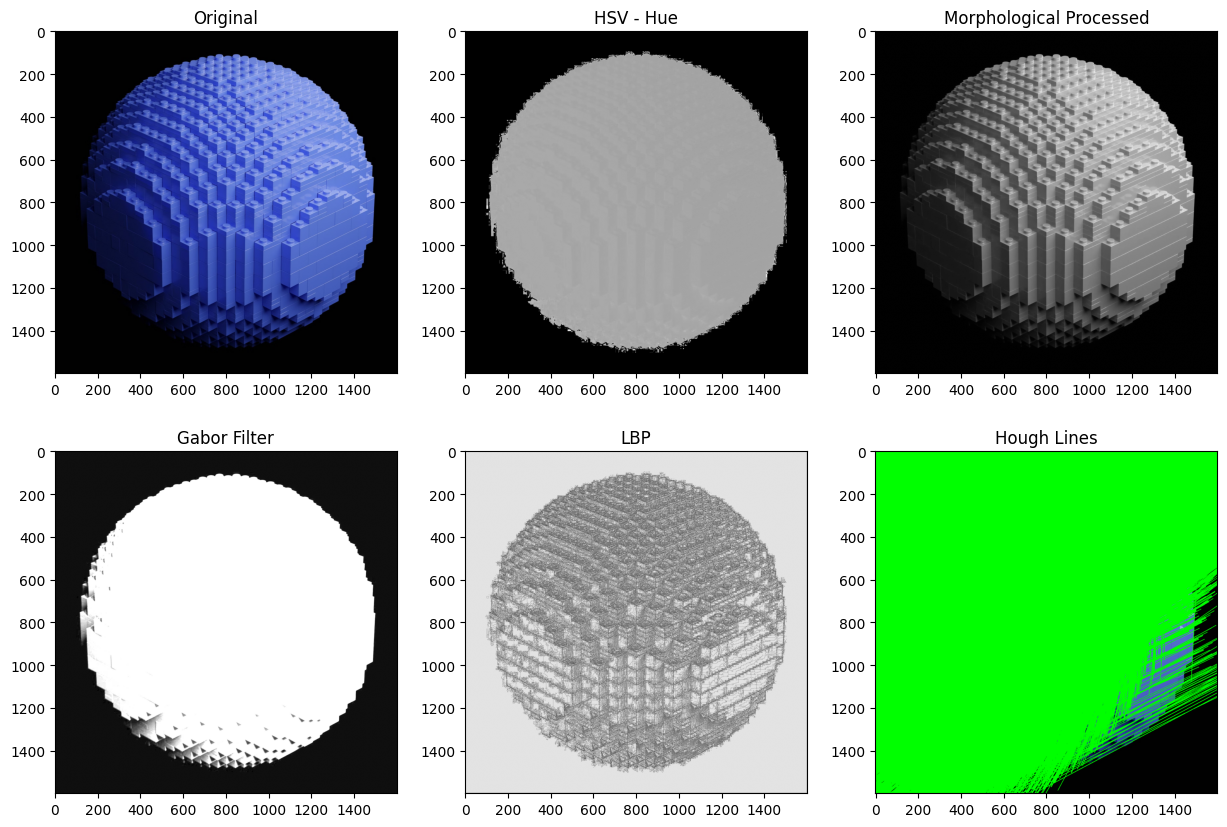

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern


image_path = "test.jpg"
image = cv2.imread(image_path)

if image is None:
    print(f"Error: Could not load image {image_path}")
    exit()


gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Morphological operations (optional)
kernel = np.ones((5,5), np.uint8)
morphed = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)

# Apply Gabor filter for texture
def gabor_filter(img, ksize=5, sigma=3, theta=np.pi/4, lambd=10, gamma=0.5):
    g_kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, 0, ktype=cv2.CV_32F)
    return cv2.filter2D(img, cv2.CV_8UC3, g_kernel)

gabor = gabor_filter(gray)

# Apply LBP (Local Binary Pattern)
radius = 1
n_points = 8 * radius
lbp = local_binary_pattern(gray, n_points, radius, method="uniform")

# Hough Transform for Line Detection
edges = cv2.Canny(gray, 50, 150)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)
hough_lines = image.copy()

if lines is not None:
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(hough_lines, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Hough Transform for Circle Detection
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1.2, minDist=20, param1=50, param2=30, minRadius=10, maxRadius=100)
hough_circles = image.copy()

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(hough_circles, (i[0], i[1]), i[2], (255, 0, 0), 2)

# Plot Results
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); axes[0, 0].set_title("Original")
axes[0, 1].imshow(hsv[:, :, 0], cmap="gray"); axes[0, 1].set_title("HSV - Hue")
axes[0, 2].imshow(morphed, cmap="gray"); axes[0, 2].set_title("Morphological Processed")
axes[1, 0].imshow(gabor, cmap="gray"); axes[1, 0].set_title("Gabor Filter")
axes[1, 1].imshow(lbp, cmap="gray"); axes[1, 1].set_title("LBP")
axes[1, 2].imshow(cv2.cvtColor(hough_lines, cv2.COLOR_BGR2RGB)); axes[1, 2].set_title("Hough Lines")

plt.show()


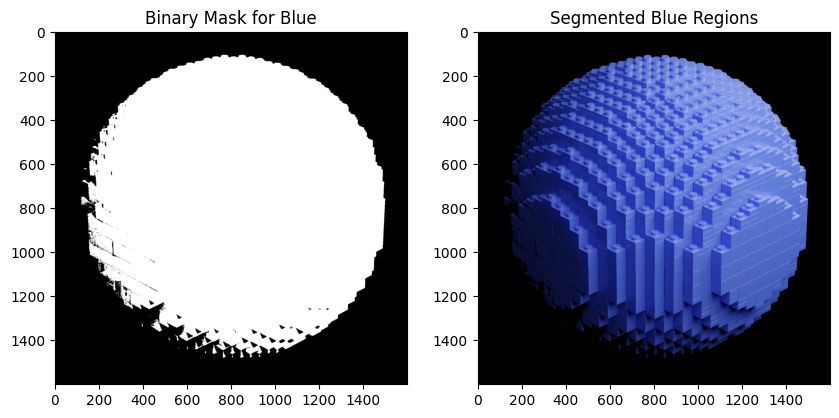

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern


image_path = "test.jpg"
image = cv2.imread(image_path)


gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)


lower_blue = np.array([100, 50, 50])   # Lower HSV threshold for blue
upper_blue = np.array([140, 255, 255]) # Upper HSV threshold for blue

mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)

# Apply the mask to extract only the blue regions
segmented_blue = cv2.bitwise_and(image, image, mask=mask_blue)

# Display Results
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(mask_blue, cmap="gray")
axes[0].set_title("Binary Mask for Blue")
axes[1].imshow(cv2.cvtColor(segmented_blue, cv2.COLOR_BGR2RGB))
axes[1].set_title("Segmented Blue Regions")
plt.show()


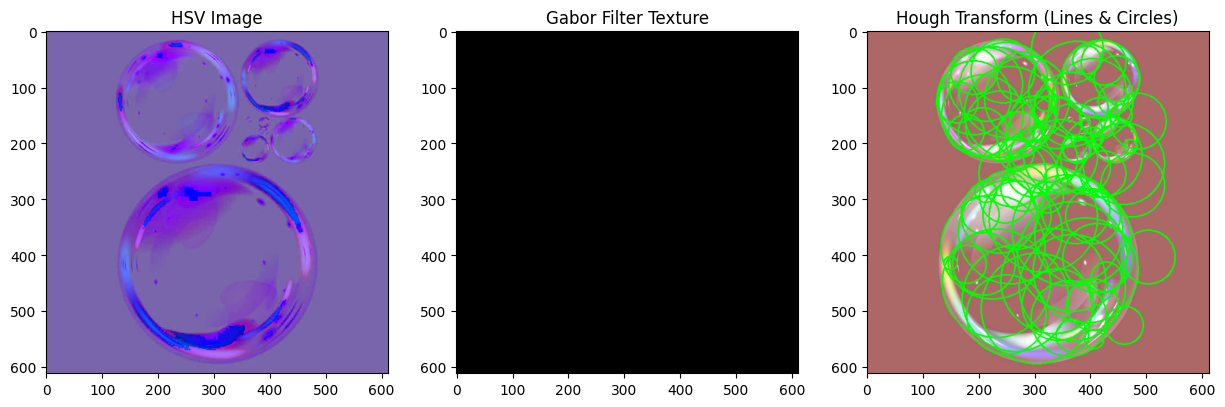

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern


image = cv2.imread("bubble2.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)


kernel = np.ones((5, 5), np.uint8)
morphed = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)


def apply_gabor(image):
    ksize = 5
    sigma = 1.0
    theta = np.pi / 4
    lamda = np.pi / 4
    gamma = 0.5
    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)
    return cv2.filter2D(image, cv2.CV_8UC3, kernel)

gabor = apply_gabor(morphed)

# Local Binary Pattern (LBP) Texture Analysis
radius = 1
n_points = 8 * radius
lbp = local_binary_pattern(morphed, n_points, radius, method="uniform")

# Hough Line Transform
edges = cv2.Canny(morphed, 50, 150)
lines = cv2.HoughLines(edges, 1, np.pi / 180, 150)

if lines is not None:
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

circles = cv2.HoughCircles(morphed, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30, param1=50, param2=30, minRadius=5, maxRadius=100)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(image, (i[0], i[1]), i[2], (0, 255, 0), 2)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(hsv)
ax[0].set_title("HSV Image")
ax[1].imshow(gabor, cmap='gray')
ax[1].set_title("Gabor Filter Texture")
ax[2].imshow(image)
ax[2].set_title("Hough Transform (Lines & Circles)")
plt.show()

